# 🧬 Deep Learning and Neural Networks Basics

This notebook explores the building blocks of **Deep Learning**, from individual neurons to complete neural networks.

You’ll understand how neurons compute, how activation functions introduce nonlinearity, and how multi-layer networks learn to model complex relationships.

---
### Objectives
- Understand neuron architecture and mathematical formulation
- Visualize key activation functions
- Build a neural network from scratch using NumPy
- Train a mini model to solve the XOR problem

## 🧠 1. From ML to Deep Learning

Machine learning models learn simple mappings between input and output — but **deep learning** extends this by stacking layers of neurons, each extracting progressively complex patterns.

### Key Idea:
- Shallow ML → learns direct relationships.
- Deep Networks → learn hierarchical features (edges → shapes → objects → meaning).

Below is a visual of the deep learning process:

In [1]:
from graphviz import Digraph

g = Digraph('DeepLearning', format='png')
g.attr(rankdir='LR', size='8,4')

g.attr('node', shape='circle', style='filled', fillcolor='lightblue')
g.node('Input', 'Input Layer')
g.node('H1', 'Hidden Layer 1')
g.node('H2', 'Hidden Layer 2')
g.node('Output', 'Output Layer')

g.edges([('Input','H1'), ('H1','H2'), ('H2','Output')])
g.attr(label='Information Flow in Deep Neural Networks')
g.render('deep_learning_flow', view=True)

'deep_learning_flow.png'

## 🧮 2. Anatomy of a Neuron

A neuron performs a weighted sum of its inputs and passes the result through an **activation function**:

$$ y = f(Wx + b) $$

Where:
- **W** = weights
- **x** = input features
- **b** = bias term
- **f** = activation function

In [2]:
import numpy as np

def neuron_output(inputs, weights, bias, activation):
    z = np.dot(inputs, weights) + bias
    return activation(z)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Example neuron with 3 inputs
inputs = np.array([0.5, 0.8, 0.2])
weights = np.array([0.9, 0.3, 0.5])
bias = 0.1

output = neuron_output(inputs, weights, bias, sigmoid)
print(f'Neuron Output (Sigmoid): {output:.4f}')

Neuron Output (Sigmoid): 0.7089


## ⚡ 3. Activation Functions

Activation functions introduce nonlinearity — allowing networks to approximate complex relationships.

We'll visualize **Sigmoid**, **ReLU**, and **Tanh**.

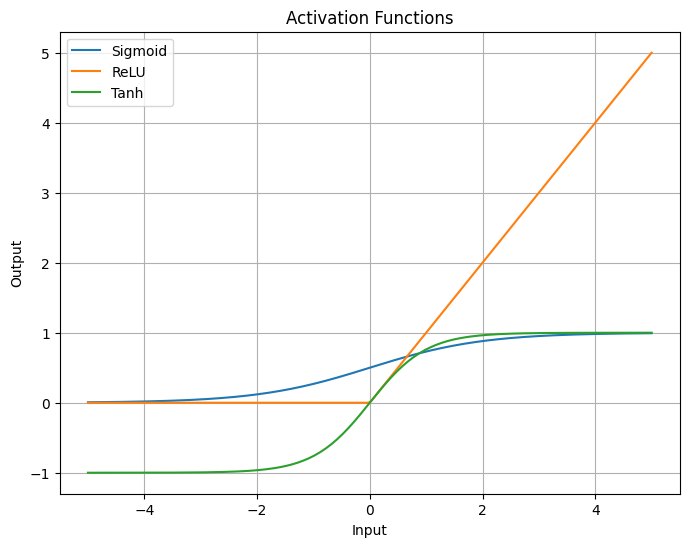

In [3]:
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 200)

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

plt.figure(figsize=(8,6))
plt.plot(x, sigmoid(x), label='Sigmoid')
plt.plot(x, relu(x), label='ReLU')
plt.plot(x, tanh(x), label='Tanh')
plt.title('Activation Functions')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()

## 🧩 4. Building a Neural Network from Scratch (NumPy)

We’ll build a **2-layer neural network** that learns the XOR function.

XOR is a perfect example of non-linear separability — classical ML models fail, but neural networks can learn it.

In [4]:
# XOR Dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Initialize parameters
np.random.seed(42)
W1 = np.random.randn(2, 3)
b1 = np.zeros((1, 3))
W2 = np.random.randn(3, 1)
b2 = np.zeros((1, 1))

def forward(X):
    Z1 = np.dot(X, W1) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

def backward(X, y, Z1, A1, Z2, A2, lr=0.1):
    global W1, b1, W2, b2
    m = y.shape[0]
    dZ2 = A2 - y
    dW2 = (1/m) * np.dot(A1.T, dZ2)
    db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * (1 - np.power(A1, 2))
    dW1 = (1/m) * np.dot(X.T, dZ1)
    db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)

    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

# Training loop
for epoch in range(10000):
    Z1, A1, Z2, A2 = forward(X)
    backward(X, y, Z1, A1, Z2, A2)
    if epoch % 1000 == 0:
        loss = np.mean(np.square(y - A2))
        print(f'Epoch {epoch} → Loss: {loss:.4f}')

print("\nPredictions:")
print(A2.round())

Epoch 0 → Loss: 0.2538
Epoch 1000 → Loss: 0.0021
Epoch 2000 → Loss: 0.0003
Epoch 3000 → Loss: 0.0001
Epoch 4000 → Loss: 0.0001
Epoch 5000 → Loss: 0.0000
Epoch 6000 → Loss: 0.0000
Epoch 7000 → Loss: 0.0000
Epoch 8000 → Loss: 0.0000
Epoch 9000 → Loss: 0.0000

Predictions:
[[0.]
 [1.]
 [1.]
 [0.]]


If everything is coded correctly, the network will converge to near-perfect predictions for the XOR outputs: `[[0], [1], [1], [0]]`.

## 📊 5. Insights and Summary

- **Neurons** compute weighted sums and transform outputs through nonlinear activations.
- **Hidden layers** enable the network to learn complex decision boundaries.
- **Activations** (ReLU, Tanh, Sigmoid) define how neurons fire and influence gradients.
- **Deep learning** is essentially multi-layered pattern recognition — stacking linear and nonlinear transformations to approximate any function.